# Plotting Spatial Changes

## By: Ty Janoski
## Updated: May 17th, 2021

In [1]:
# import statements

import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors


%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [2]:
# create function for reading in cesm-LE output
# note: each ensemble member starts on january of a different year
# please keep this in mind when combining datasets
def read_in(exp,mon,ens,var):
    """
    Use xarray to read in a netCDF file.

    Keyword arguments:
    exp -- CO2 scenario
    mon -- starting month in which CO2 is altered
    ens -- ensemble number
    var -- model output variable
    """
    filein = '/dx05/janoski/d10/Arctic_Research/cesm-LE/output/b40.1850.cam5-lens.'+exp+'.'+str(
        f"{mon:02d}")+'.'+str(f"{ens:02d}")+'.h1_'+var+'.nc'
    return(xr.open_dataset(filein,chunks=None))

In [3]:
# read in each ensemble member, both control and 4xCO2
# Take the difference of each pair

diff_list = []
for e in range(1,101,1):
    ctrl = read_in('ctrl',1,e,'TREFHT').TREFHT
    exp = read_in('4xCO2',1,e,'TREFHT').TREFHT
    
    
    # take diff
    diff = exp - ctrl
    
    # the timestamps on all the output is different because of the variable start years used in generating the ensemble members
    # we are going to override the existing time coordinate
    diff['time'] = np.arange(0,730,1)
    
    # add difference to list
    diff_list.append(diff)
    
# convert list to xarray dataset
diff = xr.concat(diff_list,dim='ensemble')

In [4]:
# take the ensemble mean
ens_mean = diff.mean(dim='ensemble')

ens_mean.to_netcdf('/home/janoski/cesm-LE_scripts/temp_changes_ens_mean.nc')

In [5]:
ens_mean.nbytes/1e6

161.46432

<ipython-input-6-a9e115195cef>:6: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = colors.DivergingNorm(vmin=-1, vcenter=0, vmax=4.0)


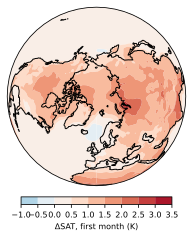

In [6]:
colors_neg = plt.cm.RdBu_r(np.linspace(0.3, 0.5, 256))
colors_pos = plt.cm.RdBu_r(np.linspace(0.5, 1, 256))
all_colors = np.vstack((colors_neg,colors_pos))
orig = colors.LinearSegmentedColormap.from_list('orig',
    all_colors)
divnorm = colors.DivergingNorm(vmin=-1, vcenter=0, vmax=4.0)

to_plot = ens_mean.isel(time=slice(None,31)).mean(dim='time')


data = to_plot
lon = to_plot.coords['lon']

lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)


# make an orthographic plot centered on north pole

fig = plt.figure(figsize=(4.5,3.5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines()

im = ax.contourf(wrap_lon, to_plot.lat, wrap_data,
                transform=ccrs.PlateCarree(),
                cmap=orig,norm=divnorm,levels=np.arange(-1,3.6,0.5))

cb = fig.colorbar(im,orientation='horizontal',shrink=0.5,pad=0.05)

cb.ax.tick_params(labelsize=8)
cb.set_label('ΔSAT, first month (K)',fontsize=8)

plt.tight_layout(w_pad=0.1)
plt.show()

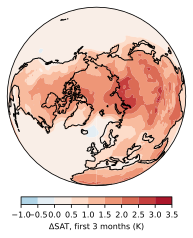

In [7]:
to_plot = ens_mean.isel(time=slice(None,90)).mean(dim='time')


data = to_plot
lon = to_plot.coords['lon']

lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)


# make an orthographic plot centered on north pole

fig = plt.figure(figsize=(4.5,3.5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines()

im = ax.contourf(wrap_lon, to_plot.lat, wrap_data,
                transform=ccrs.PlateCarree(),
                cmap=orig,norm=divnorm,levels=np.arange(-1,3.6,0.5))

cb = fig.colorbar(im,orientation='horizontal',shrink=0.5,pad=0.05)

cb.ax.tick_params(labelsize=8)
cb.set_label('ΔSAT, first 3 months (K)',fontsize=8)

plt.tight_layout(w_pad=0.05)
plt.show()

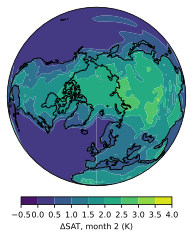

In [13]:
to_plot = ens_mean.isel(time=slice(None,131)).mean(dim='time')


data = to_plot
lon = to_plot.coords['lon']

lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)


# make an orthographic plot centered on north pole

fig = plt.figure(figsize=(4.5,3.5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines()

im = ax.contourf(wrap_lon, to_plot.lat, wrap_data,
                transform=ccrs.PlateCarree())

cb = fig.colorbar(im,orientation='horizontal',shrink=0.5,pad=0.05)

cb.ax.tick_params(labelsize=8)
cb.set_label('ΔSAT, month 2 (K)',fontsize=8)

ax.set_global()

plt.tight_layout(w_pad=0.05)
plt.show()